                                                                                           Shreyas Redij NUID: 001053076
                                                                              App                                                         
                                                           
                                                           
1) Scrape at least 5000 reviews/blogs from the web using Python. Download a positive/negative sentiment lexicon (e.g. Bing lexicon). Stem both lexicon and reviews using NLTK. Find a suitable scraping tools in Python. Prepare a labeled dataset with positive and negative labels in two different ways. The first is by applying the sentiment analysis technique that you have already learnt using a downloaded lexicon. The second is by scraping associated user ratings along with reviews. Then a review with four or more stars is labeled as positive and a review with one or two stars is labeled as negative.

2) Divide the labeled dataset into training and test datasets (e.g. 80%/20%). Run NBC in Python on the labeled training dataset for sentiment classification and then show the performance using the test dataset. Your input corresponding to a review is its sparse representation.                                                           
                                                           
                                                           

In [185]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [186]:
#Importing the required libraries
import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import nltk
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from nltk.corpus import stopwords
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from nltk.corpus import opinion_lexicon

In [187]:
import requests 
from bs4 import BeautifulSoup 
import csv 

We are uisng https://www.bestbuy.com/ for Scrapping  data for Google Home Mini

In [188]:

#Scraping Google Mini reviews from Best Buy using Beautiful Soup
data = []
for i in range(1,50):

    url = ("https://www.bestbuy.com/site/reviews/google-home-mini-charcoal/6082195?rating=1%2C2%2C3%2C4&page="+ str(i))
    page = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    #soup = BeautifulSoup(page)
    soup = BeautifulSoup(page.content, 'html5lib') 
    #print(soup.prettify())
    x = soup.find_all("li", {"class":"review-item"})
    #print(x)
    for item in x:
        author_name =item.find_all("div",attrs = {"class":"ugc-author v-fw-medium body-copy-lg"})[0].text
        #print(author_name)
        rating = (item.find_all("p",attrs={"class":"sr-only"})[0].text).split()[1]
        #print(rating)
        review_title = item.find_all("h4",attrs={"class":"review-title c-section-title heading-5 v-fw-medium"})[0].text
        #print(review_title)
        review_description = item.find_all("p",attrs={"class":"pre-white-space"})[0].text
        #print(review_description)
        data.append((author_name,rating, review_title,review_description ))

In [195]:
#Reading the reviews into a dataframe using Pandas
reviews_df= pd.DataFrame(data)
reviews_df.columns = ["Review_Author","Review_Rating","Review_Title","Review_Description"]

In [196]:
# lets look how the data looks like
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description
0,Loquita,4,Love it!,"I’m still exploring features, but is better th..."
1,Yhippa,4,A cheap way to get started with Google Assistant,The Mini does pretty much everything that the ...
2,KReed,4,Like it but not as good as the bigger home spe...,My only gripe is that even though the instruct...
3,krisiskris,4,Better than Alexa,I’ve had an Alexa Echo for about a year now an...
4,MzTrina,4,Great help when my hands are full,This google mini is very handy when your cooki...


In [197]:
reviews_df.shape

(980, 4)

In [198]:
# Postive words from lexicon
pos_list=set(opinion_lexicon.positive())

In [199]:
len(pos_list)

2006

In [200]:
# Negetive words from lexicon
neg_list=set(opinion_lexicon.negative())

In [201]:
len(neg_list)

4783

**Tokenize the words**

In [202]:
tweets = []

positive_count_summary_list = []
positive_summary_count= []

positive_words_list = []

negative_count_summary_list = []
negative_summary_count =[]

negative_words_list = []

appended_data = pd.DataFrame([])
sentiment_summary_list = []

stopwords_set = set(stopwords.words("english"))

for index, row in reviews_df.iterrows():
    
        words_filtered = [e.lower() for e in row.Review_Description.split() if len(e) >= 3]
        words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
        
        positive_words = set(pos_list).intersection(words_without_stopwords)
        positive_words_list.append(positive_words)
        
        positive_count = len(set(pos_list).intersection(words_without_stopwords))
        negative_count = len(set(neg_list).intersection(words_without_stopwords))
        
        negative_words = set(neg_list).intersection(words_without_stopwords)
        negative_words_list.append(negative_words)

        positive_count_summary_list.append(positive_count)
        negative_count_summary_list.append(negative_count)
    
        if positive_count > negative_count:
            sentiment_summary_list.append('positive')
            #tweets.append((words_without_stopwords,sentiment_summary_list))

            
        elif positive_count < negative_count:
            sentiment_summary_list.append('negative')

        else:
            sentiment_summary_list.append('neutral')
            
        tweets.append((words_without_stopwords, sentiment_summary_list[-1]))
reviews_df['summary_sentiment'] = pd.DataFrame((sentiment_summary_list))
        
        

In [203]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment
0,Loquita,4,Love it!,"I’m still exploring features, but is better th...",positive
1,Yhippa,4,A cheap way to get started with Google Assistant,The Mini does pretty much everything that the ...,negative
2,KReed,4,Like it but not as good as the bigger home spe...,My only gripe is that even though the instruct...,neutral
3,krisiskris,4,Better than Alexa,I’ve had an Alexa Echo for about a year now an...,neutral
4,MzTrina,4,Great help when my hands are full,This google mini is very handy when your cooki...,positive


In [204]:
reviews_df = reviews_df.assign(positive_words_count=pd.Series(positive_count_summary_list).values)
reviews_df = reviews_df.assign(negative_words_count=pd.Series(negative_count_summary_list).values)
reviews_df = reviews_df.assign(positive_words=pd.Series(positive_words_list).values)
reviews_df = reviews_df.assign(negative_words=pd.Series(negative_words_list).values)

In [205]:
reviews_df.head()

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment,positive_words_count,negative_words_count,positive_words,negative_words
0,Loquita,4,Love it!,"I’m still exploring features, but is better th...",positive,1,0,{better},{}
1,Yhippa,4,A cheap way to get started with Google Assistant,The Mini does pretty much everything that the ...,negative,3,5,"{pretty, nice, better}","{problem, bother, frustration, suspect, knock}"
2,KReed,4,Like it but not as good as the bigger home spe...,My only gripe is that even though the instruct...,neutral,1,1,{works},{gripe}
3,krisiskris,4,Better than Alexa,I’ve had an Alexa Echo for about a year now an...,neutral,1,1,{precise},{downside}
4,MzTrina,4,Great help when my hands are full,This google mini is very handy when your cooki...,positive,1,0,{handy},{}


**Visualized the set of positive words in reviews**

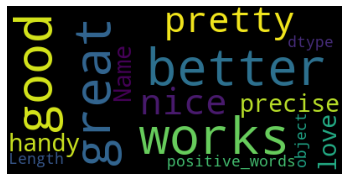

In [206]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stopwords,
                          max_words=800,
                          max_font_size=60, 
                          random_state=50).generate(str(reviews_df['positive_words']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Visualized the set of negative words in reviews**

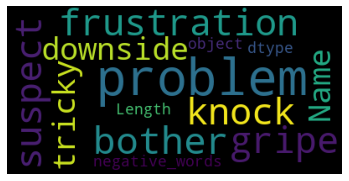

In [207]:
wordcloud = WordCloud(background_color='black',
                          #stopwords=stopwords,
                          max_words=800,
                          max_font_size=60, 
                          random_state=50).generate(str(reviews_df['negative_words']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [208]:
reviews_df['Review_Length'] = reviews_df['Review_Description'].apply(len)

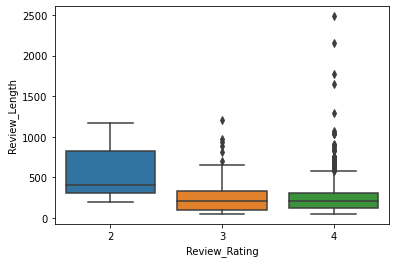

In [209]:
sns.boxplot(x='Review_Rating', y='Review_Length', data=reviews_df)

**We can obseverve that low rating has has highest review length as compared high rating**

**Correlation of review ratings to the sentiments of the reviews**

In [210]:
rating = reviews_df.groupby('Review_Rating').mean()
rating.corr()

,positive_words_count,negative_words_count,Review_Length
positive_words_count,1.000000,-0.710569,-0.994814
negative_words_count,-0.710569,1.000000,0.635318
Review_Length,-0.994814,0.635318,1.000000


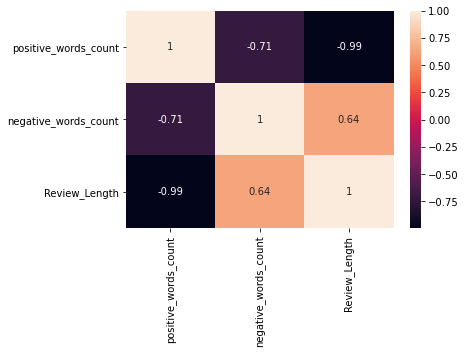

In [211]:
sns.heatmap(data=rating.corr(), annot=True)

In [212]:
df= pd.DataFrame(reviews_df[['Review_Description','summary_sentiment']])

In [213]:

df.head()

,Review_Description,summary_sentiment
0,"I’m still exploring features, but is better th...",positive
1,The Mini does pretty much everything that the ...,negative
2,My only gripe is that even though the instruct...,neutral
3,I’ve had an Alexa Echo for about a year now an...,neutral
4,This google mini is very handy when your cooki...,positive


In [214]:
tweets

[(['i’m', 'still', 'exploring', 'features,', 'better', 'expected.'],
  'positive'),
 (['mini',
   'pretty',
   'much',
   'everything',
   'google',
   'home',
   'minus',
   'expanded',
   'bass',
   'playing',
   'music.',
   'putting',
   'bedrooms',
   'suffice.',
   'basic',
   'connectivity',
   'home',
   'automation',
   'nice',
   'able',
   'perform',
   'actions',
   'different',
   'room.',
   "i've",
   'problem',
   'mini',
   'hearing',
   'me.',
   'reason',
   "i'm",
   'closer',
   'google',
   'home',
   'mini',
   'pick',
   'sometimes.',
   'one',
   'knock',
   'uses',
   'micro',
   'usb',
   'instead',
   'usb-c.',
   'bother',
   'much',
   'since',
   'practically',
   'never',
   'move',
   'it.',
   'frustration',
   'mostly',
   'google',
   'assistant.',
   'try',
   'natural',
   'queries',
   'understand',
   "i'm",
   'asking.',
   'suspect',
   "it'll",
   'get',
   'better',
   'time.',
   'another',
   'minor',
   'frustration',
   'tapping',
   'sid

**Extracted features from the reviews and sentiment**

In [215]:
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))
print(w_features)

dict_keys(['i’m', 'still', 'exploring', 'features,', 'better', 'expected.', 'mini', 'pretty', 'much', 'everything', 'google', 'home', 'minus', 'expanded', 'bass', 'playing', 'music.', 'putting', 'bedrooms', 'suffice.', 'basic', 'connectivity', 'automation', 'nice', 'able', 'perform', 'actions', 'different', 'room.', "i've", 'problem', 'hearing', 'me.', 'reason', "i'm", 'closer', 'pick', 'sometimes.', 'one', 'knock', 'uses', 'micro', 'usb', 'instead', 'usb-c.', 'bother', 'since', 'practically', 'never', 'move', 'it.', 'frustration', 'mostly', 'assistant.', 'try', 'natural', 'queries', 'understand', 'asking.', 'suspect', "it'll", 'get', 'time.', 'another', 'minor', 'tapping', 'sides', 'change', 'volume', 'awkward.', 'use', 'many', 'service', 'ecosystem', 'this!', 'gripe', 'even', 'though', 'instructions', 'say', 'tap', 'speaker', 'play/pause', 'access', 'assistant,', 'feature', 'work.', 'sister', 'issue.', 'however,', 'sometimes', 'play/pause.', 'voice', 'control', 'works', 'without', 'i

In [216]:


def extract_features(document):
    
    document_words = set(document)
    print('document',document_words)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [217]:
data= nltk.classify.apply_features(extract_features,tweets)

In [218]:

train, test = train_test_split(data,test_size = 0.2)

document {'everything', 'useful', 'breeze', 'weather', 'order', 'information', 'playing', 'around', 'up.', 'setting', 'alarms', 'system.', 'set', 'devices', 'philips', 'reset', 'google', 'apartment', 'home', "i've", 'music.', 'hue', 'sync'}
document {'alexa,', 'make', 'times', 'least', 'purchase', 'not.', 'sometimes', 'needed', 'place,', 'better', 'best', 'buy,', 'alexa', 'dot.', 'new', 'calls', 'bought', 'like', 'name!'}
document {'homes', 'music', 'broadcast', 'house.', 'devices.', "theyr'e", 'house', 'home,', 'great', 'feature', 'talk', 'switches', 'array', 'easily', 'use', 'throughout', 'smart', 'speakers', 'elsewhere', 'intercom', 'play', 'google', 'minis)', 'kids', 'control', 'also', 'make', 'scattered'}
document {'needs', 'star', 'recognize', 'find', 'feet', 'away.', 'meets', 'repeat', 'requires', 'although', 'often', 'reason'}
document {'buy', 'definitely', 'others.', 'recommend', 'awesome!!'}
document {'more.', 'echo', 'questions.', 'add', 'mostly', 'google', 'prefer', 'home',

document {'love', 'buy', 'work', 'lazy'}
document {'quite', 'good', 'helps', 'speaker', 'makes', 'bit', 'google'}
document {'downside', 'it.', 'get', 'mention', 'saying', 'thing', 'anything', 'able', 'use', 'set', 'smart', 'info', 'respond', 'devices', "can't", 'want', 'really', 'one', 'random', 'words', 'anyone', 'voice,', 'home', 'control', 'major', 'handy,', 'home.', 'though'}
document {'room', 'luck.', 'good', 'loud', 'normal', 'looking', 'first', 'sized', 'work', 'buying', 'go.', 'saying', 'mini', 'almost', 'suggest', 'main', 'gets', 'bathroom', 'hey', 'secondary', 'secondary.', 'smaller', 'point', 'one', 'google', 'home', 'great.', 'might', 'speaker', 'like'}
document {'added', 'depth', 'minute', 'proceeds', 'watching', 'work.', 'gun', 'it’s', 'overall', 'less', 'thinks', 'been.', 'wake', 'still', 'recognize', 'instances', 'look', 'remotely', 'movie', 'chimes', 'echos', 'nothing', 'list”.', 'wth', 'find', 'answer', 'way', 'echos.', 'indeed.', 'amazon', 'echo', 'sometimes', 'wish'

document {'cant', '100%', 'google.', 'get', 'home', 'mail', 'pain', 'unless', 'issue', 'new', 'one', 'correctly', 'work', 'google', 'wrong'}
document {'gift', 'music', 'got', 'longer', 'find', 'parents', 'play', 'traditional', 'radio', 'mom', 'stations.', 'use', 'loves'}
document {'say', 'get', 'see', 'great', 'ask', 'mini', 'always', 'answer', 'along.', 'hey', 'though.', 'sometimes', 'ok,', 'click.', 'mini!', 'question', 'google', 'close.', 'phone', 'seem', 'home', 'master', 'hear'}
document {'sometimes', 'product.', 'trouble', 'tasks', 'music', 'much', 'understanding', 'good', 'timers.', 'bass.', 'kitchen.', 'overall', 'really', 'helpful', 'completing', 'use', 'playing'}
document {'connected', 'wake', 'google’s', 'voice', 'answer', 'done', 'providing', 'echo', 'little', 'overlap', 'play', 'wealth', 'device', 'home', 'purposes,', 'habits.', 'front', 'live', 'everything', 'years', 'intents', 'identical', 'lights', 'launched', 'echo,', 'services', 'that’s', 'listening', 'music,', 'inten

document {'functions', 'gift', 'alot', 'everything', 'friendly', 'free', 'purchase.', 'best', 'control', 'ability', 'want,', 'alexa.', 'still', 'included', 'great', 'user'}
document {'fun', 'forecasts,', 'ordered', 'fast', 'something', 'search', 'computer', 'it,', 'weather', 'things', 'times', 'look', 'couple', 'see', 'playing', 'using', "we've", 'faster', 'far', 'expect', 'stock', 'works.', 'week.', 'music,', "also.we've", 'grandkids', 'trying', 'tablet.', 'enjoy', 'one', 'quotes,', 'getting', 'current', 'much', 'different', 'on-line', 'impressed', 'asked', 'amazingly', 'like', 'etc.'}
document {'value.nice', 'colors.', 'sound.comes', 'variety', 'sale.great', 'rich'}
document {'love', 'repeatedly', 'gift', 'throughout', 'received', 'gift!', 'day!', 'another', 'one', 'though', 'returned', 'use', 'know'}
document {'room', 'language', 'full', 'nls', 'time', 'playing', 'capacity', 'chromecast', 'small', 'optimization', 'natural', 'every', 'movies', 'makes', 'devise', 'limited', 'better', 

document {'data', 'useful', 'features.', 'special', 'features', 'mini', 'able', 'uses', 'use', 'son', 'personal', 'sending', 'google', 'phone', 'home', 'connect', 'assistant', 'calls,', 'pixel', 'messages,', 'making'}
document {'freaked', 'connected', 'stopped', 'speakers.', 'anymore.', 'mini', 'able', 'including', 'smart', 'party', 'speakers', 'fine.', 'day', 'one', 'since.', 'google', 'problems,', 'functioned', 'home', 'connect', 'speaker', 'multiple', 'overnight', 'third'}
document {'honestly', 'it,', 'free', 'mini', 'got', 'put', 'mini.', 'use', 'quality', 'nest.', 'listen', 'mostly', 'okay', 'really', 'google', 'garage', 'home', 'might', 'music.', 'pixel', 'assistance', 'sound'}
document {'used', 'little', 'hardly', 'everything', 'weather,', 'stores', 'devices', 'say.', 'except', 'cool,', 'check', 'returned', 'need', 'it.', 'google', 'b/c'}
document {'laptops', 'i’m', 'besides', 'use,', 'cellphones,', 'still', 'product', 'first', 'experience,', 'great', 'novice!', 'learning'}
docu

document {'music', 'loud', 'recognize', 'louder', 'it.', 'however', 'nice', 'alexa.', 'takes', 'mic', 'talking', 'listening', 'stand', 'solid', 'need', 'right', 'next', 'quite', 'device', 'assistant', 'speaker', 'tries', 'much'}
document {'traffic', 'decent', 'catch', 'weather,', 'honestly', 'make', 'downside', 'tells', 'sound),', 'would', 'rooms.', 'serve', 'buying', 'bundles', 'see', 'house', 'imagine', 'up.', 'some.', 'these,', 'happens,', 'away', 'star.', 'done', 'alarm,', 'capable', 'free,', '"smart"', 'hopefully', 'day', "can't", 'purpose', 'point', 'really', 'calendar,', 'check', 'product', 'one', 'functional,', 'google', 'giving', 'think', 'everything,', 'spotify', 'separately.', '---', 'phone', 'seems', 'keeps', 'same),', 'assistance', 'so-so', 'info,', 'sound', 'like', '(you', 'etc.'}
document {'it!!!!!!', 'buy', 'product!!!!', 'would', 'need', 'great'}
document {'floor', 'different', 'room', 'request.', 'one', 'installed', 'annoying', 'reacts', 'away,', 'initially', 'devices

document {'reminders,', 'set', 'easy', 'way', 'weather', 'check', 'alarms,'}
document {'promo', 'yet.', 'far', 'aspects', 'works', 'haven’t', 'bundle.', 'deployed', 'alexa.', 'included', 'like', 'fully'}
document {'stream', 'music', 'useful', 'membership', 'questions', 'even', 'overall', 'plugs', 'recognition', 'radio', 'generic', 'accent.', 'devices.', 'would', 'say', 'lights', 'premier', 'see', 'require', 'voice', 'free.', 'enabled', 'chromecast', 'alexa.', 'switches', 'cast', 'curiosity', 'use', 'yet', 'several', 'system.', 'smart', 'stations', 'add', 'definitely', 'turn', 'products', 'play', 'answering', 'chrome', 'said', 'theater', 'google', 'better', 'necessity', 'integrations', 'spotify', 'well', 'home', 'seems', 'also', 'works', 'streaming', 'anything.', 'bedroom.', 'home.', 'bought', 'non-standard', 'like', 'etc.'}
document {'music', 'can’t', 'time', 'like', 'work', 'hard', 'pretty', 'nice', 'commands.', 'mini.', 'listening,', 'also,', 'music,', 'sometimes', 'selection', 'list

document {"it's...", 'actual', 'gripe', 'things', 'repeat', 'doesnt', 'assistant,', 'work', 'completely', 'far', 'speaker,', 'wrong,', 'way', 'main', 'gets', 'satisfied', 'mic', 'want.', "i'm", 'fine.', 'say.', 'google', 'good.', 'often', 'exact'}
document {'echo', 'buy', 'dot', 'gift', 'card', 'far', 'best', 'inclusion', 'deal', 'eye', 'catching', 'deal.', 'better', '$10'}
document {'could', 'smart', 'worth', 'extra', 'cost.', 'works', 'speaker', 'music.', 'would', 'sound', 'great', 'better'}
document {'music', 'this.', 'bed', 'unless', 'spotify,', 'downloaded', 'premium', 'nature', 'talking', 'use', 'numbers.', 'complaint', 'mainly', 'play', 'items', 'sounds', 'with.', 'member', 'room,', 'list,', 'different', 'phone', 'well', 'others', 'works', 'ya,', 'remembering', 'etc.'}
document {'relative', "(it's", 'good', 'music', 'do,', 'radio', 'replace', 'using', 'actually', 'shower).', 'deal,', 'put', 'gave', 'bathroom', 'shower', "i'm", 'since', 'pack', 'one', 'ton', 'picked', 'great.', '

document {'love', 'music', 'mnage', 'two', 'harmony', 'entirely.', 'system.', 'echo', 'remote', 'reason.', 'prime', 'close', 'unlimited', 'one', 'google', "i'd", "amazon's", 'second.', 'device', 'home', 'alexa', 'bought'}
document {'light', 'ecosystem.', 'responses', 'somewhat', 'connected', 'less', 'chromecast,', 'blue', 'lacks', 'remains', 'skills.', 'experience,', 'derivatives.', 'availability', 'faster', 'terms', 'tasks', 'tooth', 'mini', 'ways', 'similar', 'hub', 'anchor', 'services', "google's", 'provide', 'alexa.', 'unlike', 'purchase', 'use', 'developed', 'quality', 'amazon', 'intended', 'echo', 'numerous', 'party', 'introduction.', 'products', 'excellent', 'superior', 'want', 'comparable', 'one', 'inquiries', 'thermostat', 'google', 'better', 'systems.', 'quite', 'happy', "amazon's", 'responding', 'via', 'assistant', 'also', 'dot,', 'works', 'ability', 'controls.', 'speaker', 'however,', 'ecosystem', 'dot.', 'speakers,', 'calls', 'third', 'inquiries,'}
document {'far', 'device

document {'echo', 'free', 'purchase.', 'received', 'far', 'seems', "i've", 'otherwise.', 'bought', 'years,', 'another', 'comparable.', 'amazon'}
document {'infancy,', 'wemo', 'harmony', 'still', 'home,', 'mini', 'technology', 'voice.', 'use', 'glitches', 'hooked', 'since', 'assistant.', 'cost.', 'lower', 'google', 'minor', 'control', 'also', 'heavy', 'primarily', 'lifting'}
document {'love', 'room', 'fun', 'music', 'friend', 'it’s', 'kitchen.', 'take', 'pandora.', 'radio', 'knowledge.', 'ask', 'mini', 'almost', 'unobtrusive.', 'doesn’t', 'favorite', 'interested', 'too.', 'i’m', 'politely', 'play', 'me.', 'kitchen', 'question', 'fact', 'lots', 'google.', 'all.', 'also', 'bought', 'there.', 'like', 'answers', 'much'}
document {'time,', 'sometimes', 'detecting', 'phrase.', 'stop', 'works,', 'enunciate', 'works', 'frustrating.', "google'", 'fine', 'found', 'issue', "'ok"}
document {'forgot', 'otherwise', 'bed.', 'lights.', 'drink', 'it,', 'finally', 'gah!"', 'handy.', 'long', 'pick', 'it.'

document {'i’ll', 'isn’t', 'repeat', 'say', 'hype.', 'follow', 'command.', 'it’ll', 'mini', 'here’s', 'always', 'nothing', 'rock', 'hey', 'classic', 'living', 'happens.', 'pandora', 'play', 'google', 'plays.', 'example', 'channel'}
document {'connected', 'requests', 'chance.', 'house', 'get', 'straight', 'mini', 'world', 'setting', 'give', 'i’ve', 'forward', 'devices', 'now.', 'google', 'used', 'happy', '“smarter”', 'response', 'homekit', 'control', 'ability', 'decided', 'alexa', 'there.', 'isn’t', 'overall,'}
document {'netflix', 'work.', 'win', 'full', 'annoying.', 'moments', 'instead', 'price', 'long', 'would', 'get', 'routines', 'offer', 'worth', 'pay', 'tv.', 'never', "they're", 'voice.', 'nice', 'be.', 'yet', 'middle', 'wish', 'definitely', 'understand', "can't", 'searching', 'play', 'want', 'really', 'hulu', 'feel', 'getting', 'lot', 'think', 'believe', 'kids', 'phone', 'something.', 'going', 'connect', 'bummer.', 'wanted', 'resume', "that's", 'like'}
document {'three', 'room', 

**Applied Naive Bayes Classifier to predict the sentiment of reviews for the test data**

In [219]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [220]:
print(nltk.classify.accuracy(classifier,test))

0.7397959183673469


It gives accuracy of 73%

**Finally, we can examine the classifier to determine which features it found most effective for distinguishing the sentiments:**

In [221]:
classifier.show_most_informative_features(5)

Most Informative Features
     containts(problems) = True           negati : positi =     41.7 : 1.0
      containts(they're) = True           negati : positi =     29.8 : 1.0
     containts(negative) = True           negati : positi =     29.8 : 1.0
     containts(sometime) = True           negati : positi =     29.8 : 1.0
       containts(voices) = True           negati : positi =     17.9 : 1.0


**This listing shows that the names in the training set that has voices has negetive senitments ratio more as compared to that of positive. t These ratios are known as likelihood ratios, and can be useful for comparing different feature-outcome relationships.**

In [222]:
tweets

[(['i’m', 'still', 'exploring', 'features,', 'better', 'expected.'],
  'positive'),
 (['mini',
   'pretty',
   'much',
   'everything',
   'google',
   'home',
   'minus',
   'expanded',
   'bass',
   'playing',
   'music.',
   'putting',
   'bedrooms',
   'suffice.',
   'basic',
   'connectivity',
   'home',
   'automation',
   'nice',
   'able',
   'perform',
   'actions',
   'different',
   'room.',
   "i've",
   'problem',
   'mini',
   'hearing',
   'me.',
   'reason',
   "i'm",
   'closer',
   'google',
   'home',
   'mini',
   'pick',
   'sometimes.',
   'one',
   'knock',
   'uses',
   'micro',
   'usb',
   'instead',
   'usb-c.',
   'bother',
   'much',
   'since',
   'practically',
   'never',
   'move',
   'it.',
   'frustration',
   'mostly',
   'google',
   'assistant.',
   'try',
   'natural',
   'queries',
   'understand',
   "i'm",
   'asking.',
   'suspect',
   "it'll",
   'get',
   'better',
   'time.',
   'another',
   'minor',
   'frustration',
   'tapping',
   'sid

In [223]:
get_words_in_tweets(tweets)

['i’m',
 'still',
 'exploring',
 'features,',
 'better',
 'expected.',
 'mini',
 'pretty',
 'much',
 'everything',
 'google',
 'home',
 'minus',
 'expanded',
 'bass',
 'playing',
 'music.',
 'putting',
 'bedrooms',
 'suffice.',
 'basic',
 'connectivity',
 'home',
 'automation',
 'nice',
 'able',
 'perform',
 'actions',
 'different',
 'room.',
 "i've",
 'problem',
 'mini',
 'hearing',
 'me.',
 'reason',
 "i'm",
 'closer',
 'google',
 'home',
 'mini',
 'pick',
 'sometimes.',
 'one',
 'knock',
 'uses',
 'micro',
 'usb',
 'instead',
 'usb-c.',
 'bother',
 'much',
 'since',
 'practically',
 'never',
 'move',
 'it.',
 'frustration',
 'mostly',
 'google',
 'assistant.',
 'try',
 'natural',
 'queries',
 'understand',
 "i'm",
 'asking.',
 'suspect',
 "it'll",
 'get',
 'better',
 'time.',
 'another',
 'minor',
 'frustration',
 'tapping',
 'sides',
 'change',
 'volume',
 'awkward.',
 'use',
 'many',
 'service',
 'google',
 'ecosystem',
 'get',
 'this!',
 'gripe',
 'even',
 'though',
 'instruction

In [224]:
df_pos = df.groupby('summary_sentiment').get_group("positive")['Review_Description']

df_neg = df.groupby('summary_sentiment').get_group("negative")['Review_Description']

In [227]:

neu_cnt = 0
pos_cnt = 0
for obj in df_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    #print(res)
    if(res == 'negative'): 
        neu_cnt = neu_cnt + 1
for obj in df_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (neu_cnt,len(df_neg)))        
print('[Positive]: %s/%s '  % (pos_cnt,len(df_pos)))

[Negative]: 6/44 
[Positive]: 780/802 


*The second is by scraping associated user ratings along with reviews. Then a review with four or more stars is labeled as positive and a review with one or two stars is labeled as negative.*



In [228]:
reviews_df['summary_sentiment_ratings'] = ['positive' if int(x) >=4 else 'negative' for x in reviews_df['Review_Rating']]

In [229]:
reviews_df.head(3)

,Review_Author,Review_Rating,Review_Title,Review_Description,summary_sentiment,positive_words_count,negative_words_count,positive_words,negative_words,Review_Length,summary_sentiment_ratings
0,Loquita,4,Love it!,"I’m still exploring features, but is better th...",positive,1,0,{better},{},60,positive
1,Yhippa,4,A cheap way to get started with Google Assistant,The Mini does pretty much everything that the ...,negative,3,5,"{pretty, nice, better}","{problem, bother, frustration, suspect, knock}",822,positive
2,KReed,4,Like it but not as good as the bigger home spe...,My only gripe is that even though the instruct...,neutral,1,1,{works},{gripe},360,positive


In [230]:
df1= pd.DataFrame(reviews_df[['Review_Description','summary_sentiment_ratings']])

In [231]:
df1.head()

,Review_Description,summary_sentiment_ratings
0,"I’m still exploring features, but is better th...",positive
1,The Mini does pretty much everything that the ...,positive
2,My only gripe is that even though the instruct...,positive
3,I’ve had an Alexa Echo for about a year now an...,positive
4,This google mini is very handy when your cooki...,positive


In [232]:
df_pos1 = df1.groupby('summary_sentiment_ratings').get_group("positive")['Review_Description']

df_neg1 = df1.groupby('summary_sentiment_ratings').get_group("negative")['Review_Description']

In [233]:
data= nltk.classify.apply_features(extract_features,tweets)

In [234]:
tweets_new=[]
for index, row in reviews_df.iterrows():
    
        words_filtered = [e.lower() for e in row.Review_Description.split() if len(e) >= 3]
        words_without_stopwords = [word for word in words_filtered if not word in stopwords_set]
        tweets_new.append((words_without_stopwords, row.summary_sentiment_ratings))

In [235]:

data1= nltk.classify.apply_features(extract_features,tweets_new)


In [236]:

train, test = train_test_split(data1,test_size = 0.2)

**Applied Naive Bayes Classifier to predict the sentiment of reviews for the test data**

In [237]:
classifier = nltk.NaiveBayesClassifier.train(train)

**Calculated the accuracy of the classifier**

In [238]:
print(nltk.classify.accuracy(classifier,test))

0.9540816326530612


In [239]:
neu_cnt = 0
pos_cnt = 0
for obj in df_neg1: 
    res =  classifier.classify(extract_features(obj.split()))
    #print(res)
    if(res == 'negative'): 
        neu_cnt = neu_cnt + 1
for obj in df_pos1: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (neu_cnt,len(df_neg)))        
print('[Positive]: %s/%s '  % (pos_cnt,len(df_pos)))

[Negative]: 20/44 
[Positive]: 900/802 


**Applying the Naive Bayes Classifier calculate the probabilities for negative and positive words.Then it selects the outcome with highest probability.

For the test data , it classifies 20 negative words from a bag of 44 words and 900 negative words from a bag of 802 words with 95 % accuracy.**